In [ ]:
!pip install python-terrier
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_colbert.git
!rm -rf /content/colbertindex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 6.6 MB/s 
     |████████████████████████████████| 1.1 MB 50.1 MB/s 
     |████████████████████████████████| 69 kB 7.0 MB/s 
     |████████████████████████████████| 303 kB 49.1 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 45 kB 3.2 MB/s 
     |████████████████████████████████| 126 kB 46.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 72 kB 1.6 MB/s 
     |████████████████████████████████| 294 kB 58.1 MB/s 
     |████████████████████████████████| 1.2 MB 59.3 MB/s 
     |████████████████████████████████| 285 kB 54.5 MB/s 
  Created wheel for python-terrier: filename=python_terrier-0.8.1-py3-none-any.whl size=104091 sha256=9c544ce4ea320d0c8f4a9f8e23c1687c33e2395d0e99c

In [ ]:
!pip install --upgrade git+https://github.com/terrierteam/pyterrier_t5.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/terrierteam/pyterrier_t5.git to /tmp/pip-req-build-l3ii1j3q
  Running command git clone -q https://github.com/terrierteam/pyterrier_t5.git /tmp/pip-req-build-l3ii1j3q
     |████████████████████████████████| 4.7 MB 31.7 MB/s 
     |████████████████████████████████| 6.6 MB 60.1 MB/s 
     |████████████████████████████████| 120 kB 76.8 MB/s 
  Created wheel for pyterrier-t5: filename=pyterrier_t5-0.0.1-py3-none-any.whl size=4880 sha256=2473409d958fdf4106f74d62b63c2de34ecce059c256fe32952ef07eb5f96668
  Stored in directory: /tmp/pip-ephem-wheel-cache-jpwdq4zb/wheels/f7/03/ca/cf7d91992877b77796d943cfe581f27398f9fa6be41236f7f6
Successfully built pyterrier-t5
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.8.1rc1
    Uninstalling tokenizers-0.8.1rc1:
      Successfully uninstalled tokenizers-0.8.1rc1
  Attempting uninstall: transformer

In [ ]:
from pyterrier_t5 import MonoT5ReRanker, DuoT5ReRanker
monoT5 = MonoT5ReRanker()
duoT5 = DuoT5ReRanker()

/usr/local/lib/python3.7/dist-packages/transformers/models/t5/tokenization_t5.py:174: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  FutureWarning,


In [ ]:
import sys

COLAB='google.colab' in sys.modules

try:
  import faiss
  faiss.get_num_gpus()
except:
  if COLAB:
    print('Installing faiss-gpu from pip ')
    !pip install faiss-gpu==1.6.3
  else:
    print('Installing faiss-gpu via Conda')
    !conda install -c pytorch faiss-gpu

import faiss


Installing faiss-gpu from pip 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 35.5 MB 1.3 MB/s 


In [ ]:
assert faiss.get_num_gpus() > 0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ir_datasets
import pyterrier as pt
if not pt.started():
  pt.init()
import pyterrier_colbert.indexing
import re

terrier-assemblies 5.6 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.6 jar not found, downloading to /root/.pyterrier...
Done


PyTerrier 0.8.1 has loaded Terrier 5.6 (built by craigmacdonald on 2021-09-17 13:27)



In [ ]:
dataset = pt.get_dataset("irds:cranfield")
index_loc = "./index_path"
indexer = pt.IterDictIndexer(index_loc)
indexref = indexer.index(dataset.get_corpus_iter())
index = pt.IndexFactory.of(indexref)

cranfield documents:   0%|          | 0/1400 [00:00<?, ?it/s]

[INFO] [starting] http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz

http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 0.0%| 0.00/507k [00:00<?, ?B/s]
http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 3.2%| 16.4k/507k [00:00<00:06, 80.2kB/s]
http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 9.7%| 49.2k/507k [00:00<00:03, 118kB/s] 
http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 17.8%| 90.1k/507k [00:00<00:02, 143kB/s]
http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 29.1%| 147k/507k [00:00<00:02, 174kB/s] 
http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: 61.4%| 311k/507k [00:01<00:00, 294kB/s]
[INFO] [finished] http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: [00:01] [507kB] [475kB/s]

http://ir.dcs.gla.ac.uk/resources/test_collections/cran/cran.tar.gz: [00:01] [507kB] [472kB/s]
                                                      

17:47:27.859 [ForkJoinPool-1-worker-3] WARN org.terrier.structures.indexing.Indexer - Adding an empty document to the index (471) - further warnings are suppressed
17:47:28.959 [ForkJoinPool-1-worker-3] WARN org.terrier.structures.indexing.Indexer - Indexed 2 empty documents


In [ ]:
print(index.getCollectionStatistics().toString())

Number of documents: 1400
Number of terms: 4560
Number of postings: 81016
Number of fields: 1
Number of tokens: 125754
Field names: [text]
Positions:   false



In [ ]:
#for retrieval and top 10 ranking
retriever_BM25 = pt.BatchRetrieve(index, controls = {"wmodel": "BM25"})
res_df = (retriever_BM25%10).search("Computer")
res_df.head()

,qid,docid,docno,rank,score,query
0,1,492,493,0,5.750147,Computer
1,1,110,111,1,5.725131,Computer
2,1,91,92,2,5.680677,Computer
3,1,1086,1087,3,5.552668,Computer
4,1,324,325,4,5.527367,Computer


In [ ]:
topics= dataset.get_topics()
qrels= dataset.get_qrels()

In [ ]:
qrels_arr =dataset.get_qrels().label
length = len(dataset.get_qrels().label)
def categorise(d):
  for i in range(length):
    if qrels.iloc[i]['docno']== d:
      if qrels_arr[i] == 1:
        return 'Relevant'
      else:
        return 'Irrelevant'
    else:
      return 'Relevant'
      
res_df['relevance'] = res_df.apply(lambda row: categorise(row['docno']), axis=1)

In [ ]:
res_df

,qid,docid,docno,rank,score,query,relevance
0,1,492,493,0,5.750147,Computer,Relevant
1,1,110,111,1,5.725131,Computer,Relevant
2,1,91,92,2,5.680677,Computer,Relevant
3,1,1086,1087,3,5.552668,Computer,Relevant
4,1,324,325,4,5.527367,Computer,Relevant
5,1,126,127,5,5.524929,Computer,Relevant
6,1,1062,1063,6,5.410455,Computer,Relevant
7,1,1387,1388,7,5.256174,Computer,Relevant
8,1,944,945,8,5.182287,Computer,Relevant
9,1,1005,1006,9,5.182287,Computer,Relevant


In [ ]:
def preprocess(doc):
    doc = re.sub('[\t\n]', ' ', doc) # remove newlines and tabs
    doc = re.sub('[^A-Za-z0-9]+', ' ', doc)
    doc = re.sub(r'@[A-Za-z0-9_]+', ' ', doc) 
    doc = re.sub(r'#[A-Za-z0-9_]+', ' ', doc) 
    doc = re.sub(r'https?://[^ ]+', ' ', doc)
    doc = re.sub(r'www.[^ ]+', ' ', doc)
    doc = re.sub(' +', ' ', doc) # substitute any number of space with one space only
    doc = re.sub("\d+", " ", doc)
    doc = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)',' ', doc)
    doc = doc.strip() # remove spaces from begining and end and lower the text
    return doc


topics.rename(columns={"text": "query"}, inplace= True)
topics['query']= topics['query'].apply(lambda x: preprocess(x))
topics.head()

,qid,query
0,1,what similarity laws must be obeyed when const...
1,2,what are the structural and aeroelastic proble...
2,4,what problems of heat conduction in composite ...
3,8,can criterion be developed to show empiricall...
4,9,what chemical kinetic system is applicable to ...


In [ ]:
res_BM25=retriever_BM25.transform(topics) 
eval = pt.Utils.evaluate(res_BM25,qrels,metrics=["map"], perquery=True)
checkpoint="http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip"

indexer_colbert = pyterrier_colbert.indexing.ColBERTIndexer(checkpoint, "/content", "colbertindex", chunksize=3)
indexer_colbert.index(dataset.get_corpus_iter())

colbert_ranking = indexer_colbert.ranking_factory()
colbert_e2e = colbert_ranking.end_to_end()

cranfield documents:   0%|          | 0/1400 [00:00<?, ?it/s]

[Aug 23, 17:47:42] [0] 		 #> Local args.bsize = 128
[Aug 23, 17:47:42] [0] 		 #> args.index_root = /content
[Aug 23, 17:47:42] [0] 		 #> self.possible_subset_sizes = [69905]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ColBERT from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ColBERT were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['linear.weight']
You should probably TRAI

[Aug 23, 17:47:54] #> Loading model checkpoint.
[Aug 23, 17:47:54] #> Loading checkpoint http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip


Downloading: "http://www.dcs.gla.ac.uk/~craigm/colbert.dnn.zip" to /root/.cache/torch/hub/checkpoints/colbert.dnn.zip


  0%|          | 0.00/1.11G [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/hub.py:647: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


[Aug 23, 17:49:41] #> checkpoint['epoch'] = 0
[Aug 23, 17:49:41] #> checkpoint['batch'] = 44500






[Aug 23, 17:49:59] #> Note: Output directory /content already exists




[Aug 23, 17:49:59] #> Creating directory /content/colbertindex 


Skipping empty passage at 470
Skipping empty passage at 994
[Aug 23, 17:50:17] [0] 		 #> Completed batch #0 (starting at passage #0) 		Passages/min: 4.8k (overall),  4.8k (this encoding),  2135.3M (this saving)
[Aug 23, 17:50:17] [0] 		 [NOTE] Done with local share.
[Aug 23, 17:50:17] [0] 		 #> Joining saver thread.
[Aug 23, 17:50:17] [0] 		 #> Saved batch #0 to /content/colbertindex/0.pt 		 Saving Throughput = 686.7k passages per minute.

#> num_embeddings = 209052
[Aug 23, 17:50:17] #> Starting..
[Aug 23, 17:50:17] #> Processing slice #1 of 1 (range 0..1).
[Aug 23, 17:50:17] #> Will write to /content/colbertindex/ivfpq.100.faiss.
[Aug 23, 17:50:17] #> Loading /content/colbertindex/0.sample ...
#> Sample has shape (10452, 128)
[Aug 23, 17:50:17] Preparing resources for 1 GPUs.
[Aug 23, 17:50:17] #> Training with the vectors...
[Aug 23, 17:50:17] 

Loading index shards to memory:   0%|          | 0/1 [00:00<?, ?shard/s]

In [ ]:
!pip install  --upgrade git+https://github.com/cmacdonald/pyterrier_bert.git
from pyterrier_bert.bert4ir import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cmacdonald/pyterrier_bert.git to /tmp/pip-req-build-qq70ok8u
  Running command git clone -q https://github.com/cmacdonald/pyterrier_bert.git /tmp/pip-req-build-qq70ok8u
  Cloning https://github.com/Georgetown-IR-Lab/cedr.git to /tmp/pip-install-ab1kbcl6/cedr_e67a285c7cdd480ebcb55a50488c58c3
  Running command git clone -q https://github.com/Georgetown-IR-Lab/cedr.git /tmp/pip-install-ab1kbcl6/cedr_e67a285c7cdd480ebcb55a50488c58c3
  Cloning https://github.com/terrier-org/pyterrier.git to /tmp/pip-install-ab1kbcl6/python-terrier_66710c19964b4f75be317e3ff36d09c2
  Running command git clone -q https://github.com/terrier-org/pyterrier.git /tmp/pip-install-ab1kbcl6/python-terrier_66710c19964b4f75be317e3ff36d09c2
     |████████████████████████████████| 753.4 MB 6.9 kB/s 
  Cloning https://github.com/cvangysel/pytrec_eval.git to /tmp/pip-install-ab1kbcl6/pytrec-eval_77

In [ ]:
BM25 = pt.BatchRetrieve(indexref, controls = {"wmodel": "BM25"})
TF_IDF =  pt.BatchRetrieve(indexref, controls = {"wmodel": "TF_IDF"})
PL2 =  pt.BatchRetrieve(indexref, controls = {"wmodel": "PL2"})
DirichletLM = pt.BatchRetrieve(indexref, wmodel="DirichletLM")

In [ ]:
def experiment(transformers, names_):
  return pt.Experiment(transformers, topics, qrels, ['map','ndcg'], names = names_, baseline=0)

In [ ]:
BM25 = pt.BatchRetrieve(indexref, controls = {"wmodel": "BM25"})
TF_IDF =  pt.BatchRetrieve(indexref, controls = {"wmodel": "TF_IDF"})
PL2 =  pt.BatchRetrieve(indexref, controls = {"wmodel": "PL2"})
DirichletLM = pt.BatchRetrieve(indexref, wmodel="DirichletLM")
pipe_BM25 = BM25 >> (TF_IDF ** PL2) #union of TD_IDF and PL2 , re-rank with BM25
pipe_colbert_bm25 = BM25%10 >> colbert_e2e
colbert_prf_rank = colbert_ranking.prf(rerank=False)  #colbert and colbert=prf rank
colbert_prf_rerank = colbert_ranking.prf(rerank=True)
pipe_bm25_col = colbert_e2e >> BM25
bo1 = pt.rewrite.Bo1QueryExpansion(index)
bo1_prf= BM25%10 >> bo1
pipe_bm25_bo1prf = (bo1_prf) >> colbert_e2e
DPH_br = pt.BatchRetrieve(indexref, controls = {"wmodel": "DPH"}) 
bertpipe = DPH_br >> BERTPipeline(max_valid_rank=10)
bm25_colbert_prf = BM25 >> colbert_prf_rank
pipe_bm25_bert = bertpipe >> BM25
pipe_bm25_prf_colbert = colbert_e2e%10 >> (BM25 >> colbert_prf_rank)
bm25 = pt.BatchRetrieve(indexref, wmodel="BM25") % 10
mono_pipeline = bm25 >> pt.text.get_text(dataset, "text") >> monoT5
duo_pipeline = mono_pipeline % 10 >> duoT5


loading file https://huggingface.co/bert-base-uncased/resolve/main/vocab.txt from cache at /root/.cache/huggingface/transformers/45c3f7a79a80e1cf0a489e5c62b43f173c15db47864303a55d623bb3c96f72a5.d789d64ebfe299b0e416afc4a169632f903f693095b4629a7ea271d5a0cf2c99
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer.json from cache at /root/.cache/huggingface/transformers/534479488c54aeaf9c3406f647aa2ec13648c06771ffe269edabebd4c412da1d.7f2721073f19841be16f41b0a70b600ca6b880c8f3df6f3535cbc704371bdfa4
loading file https://huggingface.co/bert-base-uncased/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/special_tokens_map.json from cache at None
loading file https://huggingface.co/bert-base-uncased/resolve/main/tokenizer_config.json from cache at /root/.cache/huggingface/transformers/c1d7f0a763fb63861cc08553866f1fc3e5a6f4f07621be277452d26d71303b7e.20430bd8e10ef77a7d2977accefe796051e01bc2fc4aa146bc862997a

[Aug 23, 17:55:27] #> Building the emb2tid mapping..
209052
Computing collection frequencies
Done
Loading doclens


Computing document frequencies: 100%|██████████| 1398/1398 [00:00<00:00, 22612.46d/s]


  0%|          | 0/30522 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1037: UserWarning: You have sklearn version 1.0.2 - sklearn KMeans clustering changed in 0.24, so performance may differ from those reported in the ICTIR 2021 paper, which used 0.23.2. See also https://github.com/scikit-learn/scikit-learn/issues/19990
  "See also https://github.com/scikit-learn/scikit-learn/issues/19990" % str(sklearn.__version__))


  0%|          | 0/30522 [00:00<?, ?it/s]

loading configuration file https://huggingface.co/bert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/3c61d016573b14f7f008c02c4e51a366c67ab274726fe2910691e2a761acf43e.37395cee442ab11005bcd270f3c34464dc1704b715b5d7d52b1a461abe3b9e4e
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.21.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file https://huggingface.co/bert-base-uncased/resolve/ma

storing https://huggingface.co/distilbert-base-uncased/resolve/main/config.json in cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
creating metadata file for /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
loading configuration file https://huggingface.co/distilbert-base-uncased/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/23454919702d26495337f3da04d1655c7ee010d5ec9d77bdb9e399e00302c0a1.91b885ab15d631bf9cee9dc9d25ece0afd932f2f5130eba28f2055b2220c0333
Model config DistilBertConfig {
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_

storing https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin in cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
creating metadata file for /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
loading weights file https://huggingface.co/distilbert-base-uncased/resolve/main/pytorch_model.bin from cache at /root/.cache/huggingface/transformers/9c169103d7e5a73936dd2b627e42851bec0831212b677c637033ee4bce9ab5ee.126183e36667471617ae2f0835fab707baa54b731f991507ebbb55ea85adb12a
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weigh

In [ ]:
e1_trans= [BM25,TF_IDF,PL2,DirichletLM, colbert_e2e, pipe_BM25, pipe_colbert_bm25, colbert_prf_rerank, pipe_bm25_col, pipe_bm25_bo1prf, pipe_bm25_prf_colbert, bm25, mono_pipeline, duo_pipeline]
e1_names= ['BM25','TF_IDF', 'PL2', 'DirichletLM', 'ColBERT','bm25_tdidfpl2', 'COL_BM25', 'Colbert_prf_rank', 'BM25_Col', 'bo1_col', 'BM25_PRF_COLBERT',"BM25", "BM25 >> monoT5", "BM25 >> monoT5 >> duoT5"]
finalOut = experiment(e1_trans, e1_names)

/usr/local/lib/python3.7/dist-packages/pyterrier_colbert/ranking.py:1084: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  torch.Tensor(exp_embds)])
[INFO] [starting] building docstore
docs_iter: 100%|████████████████████████| 1400/1400 [00:00<00:00, 21550.14doc/s]
[INFO] [finished] docs_iter: [00:00] [1400doc] [21118.67doc/s]
[INFO] [finished] building docstore s]


monoT5:   0%|          | 0/563 [00:00<?, ?batches/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (565 > 512). Running this sequence through the model will result in indexing errors


monoT5:   0%|          | 0/563 [00:00<?, ?batches/s]

duoT5:   0%|          | 0/225 [00:00<?, ?queries/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (835 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# setting baseline as BM25
finalOut['idx']=finalOut.index
finalOut

,name,map,ndcg,map +,map -,map p-value,ndcg +,ndcg -,ndcg p-value,idx
0,BM25,0.015105,0.139362,NaN,NaN,NaN,NaN,NaN,NaN,0
1,TF_IDF,0.013631,0.136626,68.0,64.0,2.152525e-01,64.0,68.0,1.088688e-01,1
2,PL2,0.013758,0.137053,68.0,68.0,2.877181e-01,71.0,65.0,2.196354e-01,2
3,DirichletLM,0.013106,0.137427,70.0,65.0,1.156806e-01,72.0,63.0,2.915499e-01,3
4,ColBERT,0.012859,0.191687,100.0,51.0,2.821529e-01,115.0,36.0,7.332510e-16,4
5,bm25_tdidfpl2,0.015105,0.139362,0.0,0.0,NaN,0.0,0.0,NaN,5
6,COL_BM25,0.012859,0.191687,100.0,51.0,2.821529e-01,115.0,36.0,7.332510e-16,6
7,Colbert_prf_rank,0.011700,0.145999,72.0,77.0,8.556680e-02,71.0,78.0,2.583920e-01,7
8,BM25_Col,0.016617,0.196829,131.0,19.0,1.596564e-12,138.0,12.0,1.106206e-26,8
9,bo1_col,0.008503,0.186098,98.0,54.0,4.853511e-02,112.0,40.0,1.101142e-08,9


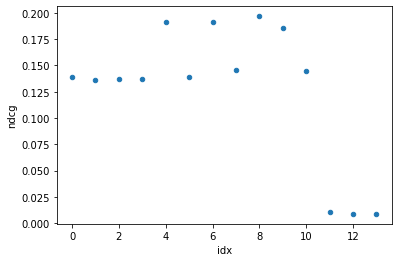

In [ ]:
ax1 = finalOut.plot.scatter(x='idx', y='ndcg', colormap='viridis')

In [ ]:
e1_trans= [colbert_e2e, BM25,TF_IDF,PL2,DirichletLM, pipe_BM25, pipe_colbert_bm25, colbert_prf_rerank, pipe_bm25_col, pipe_bm25_bo1prf, pipe_bm25_prf_colbert, bm25, mono_pipeline, duo_pipeline]
e1_names= ['ColBERT', 'BM25','TF_IDF', 'PL2', 'DirichletLM','bm25_tdidfpl2', 'COL_BM25', 'Colbert_prf_rank', 'BM25_Col', 'bo1_col', 'BM25_PRF_COLBERT',"BM25", "BM25 >> monoT5", "BM25 >> monoT5 >> duoT5"]
finalOut = experiment(e1_trans, e1_names)

monoT5:   0%|          | 0/563 [00:00<?, ?batches/s]

monoT5:   0%|          | 0/563 [00:00<?, ?batches/s]

duoT5:   0%|          | 0/225 [00:00<?, ?queries/s]

In [ ]:
# setting baseline as ColBERT
finalOut['idx']=finalOut.index
finalOut

,name,map,ndcg,map +,map -,map p-value,ndcg +,ndcg -,ndcg p-value,idx
0,ColBERT,0.012859,0.191687,NaN,NaN,NaN,NaN,NaN,NaN,0
1,BM25,0.015105,0.139362,51.0,100.0,0.282153,36.0,115.0,7.332510e-16,1
2,TF_IDF,0.013631,0.136626,48.0,103.0,0.543542,34.0,117.0,9.811191e-19,2
3,PL2,0.013758,0.137053,48.0,103.0,0.477636,34.0,117.0,2.276146e-18,3
4,DirichletLM,0.013106,0.137427,48.0,103.0,0.894840,33.0,118.0,4.566815e-18,4
5,bm25_tdidfpl2,0.015105,0.139362,51.0,100.0,0.282153,36.0,115.0,7.332510e-16,5
6,COL_BM25,0.012859,0.191687,0.0,0.0,NaN,0.0,0.0,NaN,6
7,Colbert_prf_rank,0.011700,0.145999,34.0,117.0,0.071182,25.0,126.0,7.101592e-26,7
8,BM25_Col,0.016617,0.196829,82.0,69.0,0.067650,84.0,67.0,8.912464e-02,8
9,bo1_col,0.008503,0.186098,77.0,75.0,0.088515,73.0,79.0,2.088515e-01,9


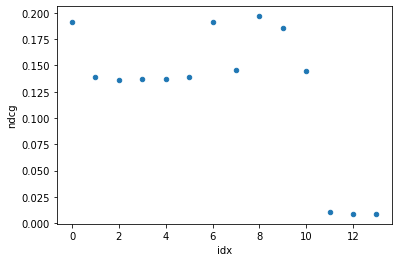

In [ ]:
ax1 = finalOut.plot.scatter(x='idx', y='ndcg', colormap='viridis')